In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot =pd.get_dummies(insurance).astype(float)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X =insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46.0,19.950,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,47.0,24.320,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,52.0,24.860,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,39.0,34.320,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,54.0,21.470,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18.0,31.350,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1130,39.0,23.870,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1294,58.0,25.175,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
860,37.0,47.600,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics =["mae"])
insurance_model.fit(X_train,y_train,epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10192.2695 - mae: 10192.2695
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7664.7573 - mae: 7664.7573
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7567.0996 - mae: 7567.0996
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7479.1362 - mae: 7479.1362
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7343.6865 - mae: 7343.6865
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7816.1890 - mae: 7816.1890
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7269.2827 - mae: 7269.2827
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7338.2539 - mae: 7338.2539
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7152.7197 - mae: 7152.7197
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7353.0396 - mae: 7353.0396
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7362.0415 - mae: 7362.0415
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6337.8496 - mae: 6337.8496  


[6121.484375, 6121.484375]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics =["mae"])
insurance_model_2.fit(X_train,y_train,epochs=100,verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13259.7119 - mae: 13259.7119
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13124.4209 - mae: 13124.4209
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12849.8096 - mae: 12849.8096
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12298.1768 - mae: 12298.1768
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11330.9521 - mae: 11330.9521
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9976.1436 - mae: 9976.1436  
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8559.5605 - mae: 8559.5605
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7637.9189 - mae: 7637.9189
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7430.5381 - mae: 7430.5381
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7393.6992 - mae: 7393.6992
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7372.4453 - mae: 7372.4453
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5027.7119 - mae: 5027.7119  


[4880.64111328125, 4880.64111328125]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6337.8496 - mae: 6337.8496 


[6121.484375, 6121.484375]

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics =["mae"])
history = insurance_model_3.fit(X_train,y_train,epochs=200,verbose = 1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13256.7822 - mae: 13256.7822
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13094.2646 - mae: 13094.2646
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12779.4990 - mae: 12779.4990
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12156.9160 - mae: 12156.9160
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11080.3818 - mae: 11080.3818
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9637.7959 - mae: 9637.7959
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8245.1377 - mae: 8245.1377
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7497.7134 - mae: 7497.7134
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7378.4707 - mae: 7378.4707
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7351.7539 - mae: 7351.7539
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7330.1050 - mae: 7330.1050
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3465.9961 - mae: 3465.9961  


[3401.58349609375, 3401.58349609375]

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5027.7119 - mae: 5027.7119 


[4880.64111328125, 4880.64111328125]

Text(0.5, 0, 'epochs')

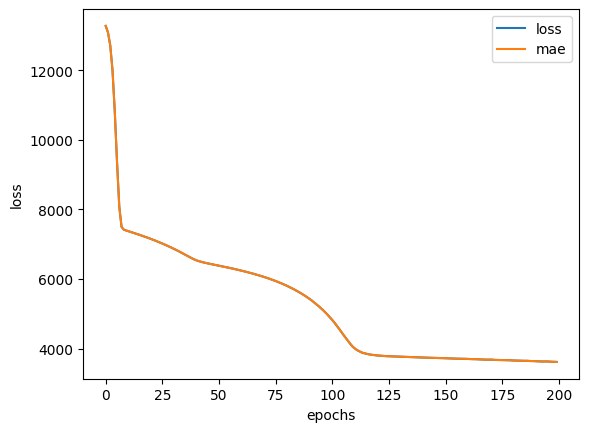

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

<Axes: ylabel='Frequency'>

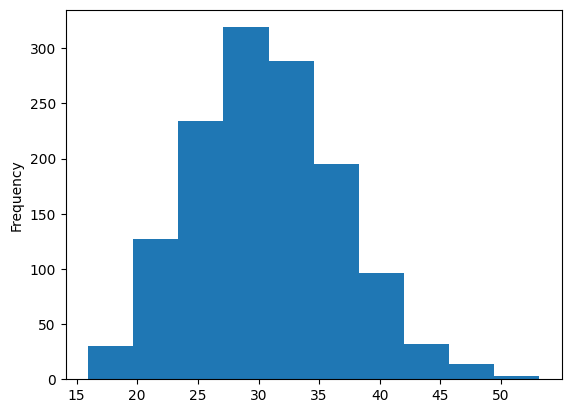

In [ ]:
X["bmi"].plot(kind='hist')

<Axes: ylabel='Frequency'>

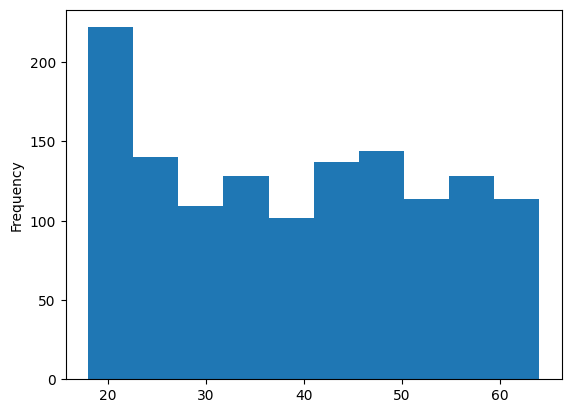

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

,count
children,
0.0,574
1.0,324
2.0,240
3.0,157
4.0,25
5.0,18


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
categorical_features = insurance_one_hot.columns[insurance_one_hot.columns.str.startswith(('sex_', 'smoker_', 'region_'))].tolist()

ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),categorical_features)
)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        ])

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics =["mae"])
insurance_model_4.fit(X_train_normal,y_train,epochs=100,verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13296.0684 - mae: 13296.0684
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13280.4316 - mae: 13280.4316
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13238.4668 - mae: 13238.4668
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13147.1768 - mae: 13147.1768
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12984.0713 - mae: 12984.0713
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12727.6533 - mae: 12727.6533
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12357.7246 - mae: 12357.7246
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11862.1162 - mae: 11862.1162
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11274.3525 - mae: 11274.3525
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10674.2979 - mae: 10674.2979
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10071.3652 - mae: 10071.3652
Epoch 12/100
34/34 ━━━━━━━━━━━

In [ ]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3219.8047 - mae: 3219.8047  


[3173.180419921875, 3173.180419921875]

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5027.7119 - mae: 5027.7119 


[4880.64111328125, 4880.64111328125]

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3465.9961 - mae: 3465.9961 


[3401.58349609375, 3401.58349609375]